## Notebook for calculating the eigenvalues of RGGs

### Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pickle

import sys
import os

project_path = os.path.expanduser('~/repos/metric_graph/')
sys.path.append(project_path)

from construct_graph.graph import Graph, Flat
import construct_graph
from calculations.helper_functions import check_convergence, sequential_Newton
import solve_laplace_operator

%load_ext autoreload
%autoreload 2

### Define graph sizes

In [7]:
start_power, end_power = 3, 6
nums_Vs = (10**np.linspace(start_power, end_power, (end_power - start_power) * 5 + 1)).astype(int)[:11]
print(nums_Vs)

[  1000   1584   2511   3981   6309  10000  15848  25118  39810  63095
 100000]


### Run Newton search or load results

#### Newton search

In [178]:
# eigenvalues = {}
means = np.mean(list(eigenvalues[10000].values()))

for en, num_Vs in enumerate(nums_Vs[6:8]):

    en += 6

    print(f"\n\ngraph size = {en + 1} / {len(nums_Vs)}\n\n\n")

    eigenvalues[num_Vs] = []
    check = False
    seed = -1

    if num_Vs < 900:
        guesses = np.linspace(2.5, 4.5, 40)
    elif num_Vs < 2000:
        guesses = np.linspace(3, 4.2, 30)
    elif num_Vs < 4000:
        guesses = np.linspace(3.1, 3.8, 20)
    else:
        guesses = np.linspace(3.4, 3.83, 12)

    if en == 0:
        previous_mean = None
    else:
        previous_mean = np.mean(means)

    means = []

    if en == 0:
        while seed < 256:
            seed += 1
            np.random.seed(seed)
            rd = construct_graph.patch_graph.RGG(num_Vs)
            g = construct_graph.patch_graph.Patch(rd)
            print(f"\nSEED = {seed}, num_Vs = {g.num_Vs}\n")
            eigs = solve_laplace_operator.solve_laplace_operator.Eigenvalue_Calculator(g)
            full_solutions = sequential_Newton(guesses, eigs)
            if len(full_solutions) != 4:
                eigenvalues[num_Vs].append(["bad", full_solutions])
            else:
                eigenvalues[num_Vs].append(full_solutions)
                means.append(np.mean(full_solutions))
                print(full_solutions)
                print(means)

    else:
        while not check:
            seed += 1
            np.random.seed(seed)
            rd = construct_graph.patch_graph.RGG(num_Vs)
            g = construct_graph.patch_graph.Patch(rd)
            print(f"\nSEED = {seed}, num_Vs = {g.num_Vs}\n")
            eigs = solve_laplace_operator.solve_laplace_operator.Eigenvalue_Calculator(g)
            full_solutions = sequential_Newton(guesses, eigs)
            if len(full_solutions) != 4:
                eigenvalues[num_Vs].append(["bad", full_solutions])
            else:
                eigenvalues[num_Vs].append(full_solutions)
                means.append(np.mean(full_solutions))
                print(full_solutions)
                print(means)

            check = check_convergence(means, mean_previous_graph_size=previous_mean)



graph size = 7 / 11




SEED = 0, num_Vs = 15848


Calculating eig number 0

----------------------
Converged at step 1:

k = 3.587460221463811
----------------------

Calculating eig number 1

----------------------
Converged at step 2:

k = 3.6013262199692044
----------------------

Calculating eig number 2

----------------------
Converged at step 0:

k = 3.6737607424838647
----------------------

Calculating eig number 3

----------------------
Converged at step 1:

k = 3.738601962049831
----------------------
[3.58746022 3.60132622 3.67376074 3.73860196]
[3.6502872864916776]

SEED = 1, num_Vs = 15848


Calculating eig number 0

----------------------
Converged at step 1:

k = 3.6074578280625866
----------------------

Calculating eig number 1

----------------------
Converged at step 0:

k = 3.6170088465416668
----------------------

Calculating eig number 2

----------------------
Converged at step 2:

k = 3.696716958098383
----------------------

Calculating eig number 3

----

/Users/sholden/repos/metric_graph/construct_graph/graph.py:42: RuntimeWarning: divide by zero encountered in divide
  return 1 / np.sin(k * l)
/Users/sholden/repos/metric_graph/construct_graph/graph.py:50: RuntimeWarning: divide by zero encountered in divide
  return 1 / np.tan(k * l)


Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular

Calculating eig number 0

Factor is exactly singular
----------------------
Converged at step 0:

k = 0
----------------------

Current dif = 0.0008631064154553386 vs. adaptive tol = 2.029162431958292e-05


SEED = 10, num_Vs = 15848


Calculating eig number 0

----------------------
Converged at step 1:

k = 3.541589014303362
----------------------

Calculating eig number 1



#### Load results

In [ ]:
# file = open("../data/rgg/torus_eigenvalues/torus_eigenvalues.pkl", "wb")
# eigenvalues = pickle.load(file)
# file.close()

### Calculate means over ensembles for each graph size

In [214]:
torus_means = []
torus_nums_Vs = np.sort(list(eigenvalues.keys()))
for num_Vs in eigenvalues:
    torus_means.append(np.mean(list(eigenvalues[num_Vs].values())))
torus_means = np.array(torus_means)
print(torus_means)

In [ ]:
coefficient = 0.6781071615369281
continuum_eigenvalue = coefficient * 4 * np.pi**2 / 2

(800, 120000)

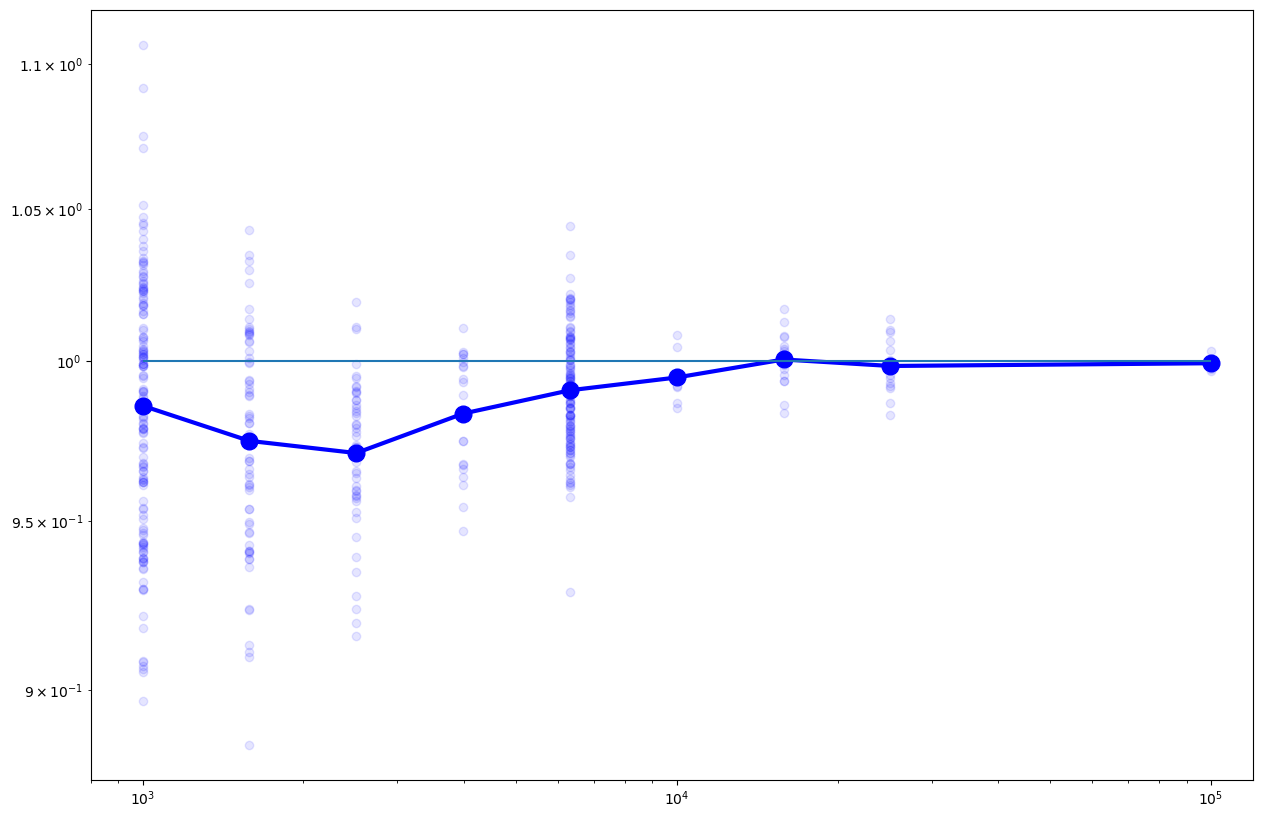

In [235]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

eigenvalue_linewidth = 3
eigenvalue_markersize = 12
ax.loglog(torus_nums_Vs, torus_means**2 / continuum_eigenvalue, 'o-', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)
# ax.plot(sphere_nums_Vs, sphere_means**2 / sphere_continuum_eigenvalue, 'o-', c='g', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)
# ax.set_xscale('log')

ax.hlines(1, 1000, 100000)

for num_Vs in torus_nums_Vs:
    y = np.mean(list(eigenvalues[num_Vs].values()), axis=1)**2 / continuum_eigenvalue
    x = np.ones(len(y)) * num_Vs
    ax.scatter(x, y, c='b', zorder=0, alpha=0.1)

ax.set_xlim([800, 120000])

# style_plot(fig, ax, aspect=None)

# ax.set_ylim([0.9, 0.925])

# plt.savefig("../figures/delaunay/eigenvalue_raw_plot.png", dpi=300, bbox_inches="tight")


(800, 120000)

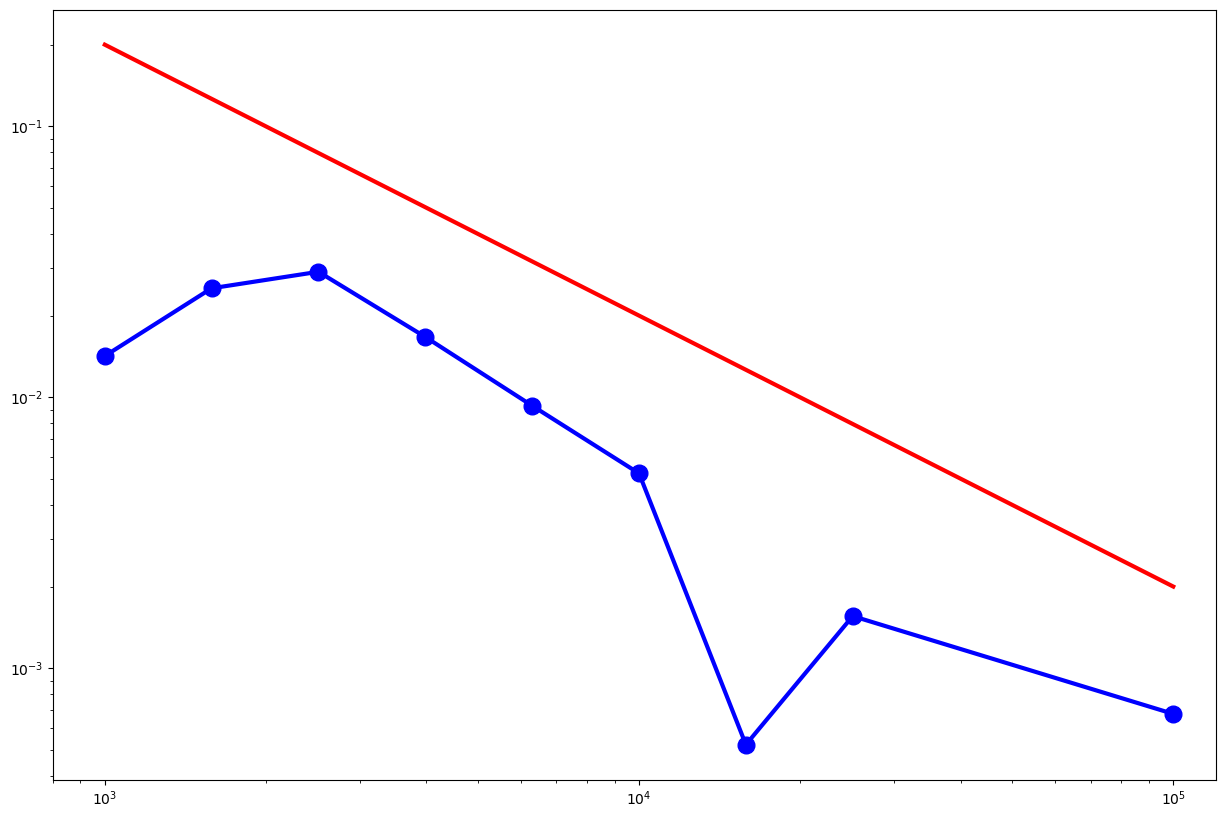

In [243]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

eigenvalue_linewidth = 3
eigenvalue_markersize = 12
ax.loglog(torus_nums_Vs, np.abs(torus_means**2 - continuum_eigenvalue) / continuum_eigenvalue, 'o-', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)
ax.loglog(torus_nums_Vs, torus_nums_Vs**(-1.) * 200, '-', c='r', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

ax.set_xlim([800, 120000])

In [247]:
# file = open("../data/rgg/torus_eigenvalues/rgg_eigenvalues.pkl", "wb")
# pickle.dump(eigenvalues, file)

{0: array([3.58727542, 3.64223553, 3.6619912 , 3.72395746]),
 1: array([3.60473501, 3.64141504, 3.67911092, 3.68611306]),
 2: array([3.60381388, 3.61637779, 3.69237261, 3.74601843]),
 3: array([3.62390905, 3.64250559, 3.65878858, 3.69696047]),
 4: array([3.62187275, 3.63384915, 3.68077016, 3.70297792])}

In [254]:
big_eigs

[array([3.58727542, 3.64223553, 3.6619912 , 3.72395746]),
 array([3.60473501, 3.64141504, 3.67911092, 3.68611306]),
 array([3.60381388, 3.61637779, 3.69237261, 3.74601843]),
 array([3.62390905, 3.64250559, 3.65878858, 3.69696047]),
 array([3.62187275, 3.63384915, 3.68077016, 3.70297792])]